In [1]:
from fastai import *
from fastai.basic_train import *
from fastai.core import *
from fastai.vision import *

In [2]:
path = Path('../../../Data/cifar10/')
data = (ImageList.from_folder(path)
                .split_none()
                .label_from_folder()
                .databunch(bs=64, num_workers=8, device=torch.device('cuda')).normalize(([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])))

In [3]:
model = models.resnet18(pretrained=True)
loss_fn = nn.CrossEntropyLoss()
# optim = torch.optim.Adam(model.parameters(), lr=0.001)

learn = Learner(data, model, opt_func=partial(optim.Adam, betas=(0.9, 0.999)), loss_func=loss_fn, wd=0)

In [4]:
learn = Learner(data, model)

In [5]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


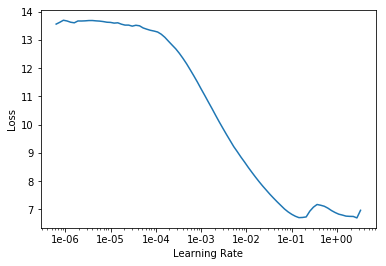

In [6]:
fig = learn.recorder.plot(return_fig=True)

In [7]:
fig.savefig('/home/kushaj/Desktop/my_fig.png')

In [15]:
learn.fit_one_cycle(1, max_lr=0.01)

epoch,train_loss,valid_loss,time
0,1.033069,,01:57


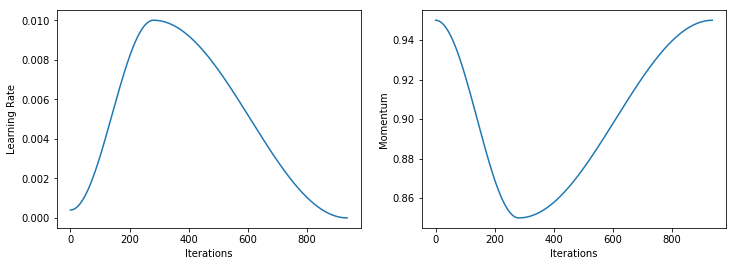

In [16]:
learn.recorder.plot_lr(show_moms=True)